# Prediksi Harga Mobil Audi - Ni Putu Sintia Wati

## Domain Project

mobil menjadi sarana transportasi yang dimiliki sebagian besar lapisan masyarakat. Terdapat berbagai merek dan jenis mobil dengan spesifik yang bervariasi. Model bisnis yang diterapkan yaitu sebagai tim marketing, yang bertugas untuk menentukan harga produk yang akan dipasarkan. Para konsumen mencari informasi baik dari situs asli atau katalog mobil yang tersedia. 

Untuk efisiensi, kita akan menerapkan teknik predictive modelling untuk memprediksi harga mobil tersebut sehingga dapat memudahkan konsumen dalam menentukan model mobil yang ingin dibelinya. Merek mobil yang dijadikan contoh yakni merek Audi. Dalam penjualannya, harga mobil dipengaruhi oleh fitur khusus, seperti model, tahun registrasi, harga (dalam satuan euro), jenis transmisi,jarak tempuh, jenis bahan bakar, pajak, mpg(penggunaan bahan bakar), dan kapasitas mesin. 

## Business Understanding

### Problem Statement

1. dari semua fitur yang ada, fitur apa yang paling berpengaruh dalam menentukan harga mobil?
2. berapa harga pasar mobil dengan fitur tententu?

### Goals 

- Mengetahui fitur yang memiliki hubungan dengan harga mobil.
- Membuat Model ML yang dapat memprediksi harga berdasarkan fitur yang ada

### Solution statements
pada kasus ini, kami mengajukan tiga algoritma machine learning sebagai solusi permasalahan, yaitu KNN Algorithm, Random Forest dan Boosting Algorithm. 

- **KNN**. 
cara kerja algoritma KNN yaitu mengklasifikasi sekumpulan data dengan menentukan jumlah tetangga terdekat lalu menghitung jarak objek terhadap data latih dengan perhitungan kuadrat jarak eucliden. KNN memiliki kelebihan, salah satunya mudah diimplementasi karena hanya menentukan objek dengan menghitung jarak antar instance. namun salah satu kekurangan dari algoritma ini yaitu perlu menunjukan parameter k dan menentukan nilai k yang sesuai untuk menghindari outlier dalam KNN

- **Random Forest**. 
cara kerja dari Random Forest yaitu memecah data ke dalam decision tree secara acak. lalu akan dilakukan pemilihan untuk setiap kelas dari data sampel. kemudian mengkombinasikan hasil suara dari setiap kelas untuk diambil yang terbanyak. salah satu kelebihan dari random forest yaitu dapat mengatasi missing value data pada jumlah yang besar. namun salah satu kelemahan dari Random Forest antara lain proses learning yang lambat karena karena bergantung pada parameter yang digunanakan.

- **Boosting Algorithm**. 
cara kerja dari algoritma boosting yaitu membangun model dari data latih lali membuat model kedua untuk memperbaiki kesalahan di model pertama. penambahan model dilakukan hingga mencapai jumlah maksimum model untuk ditambahkan. 


## Data Understanding


Data yang digunakan untuk projek kali ini yaitu audi car dataset yang diunduh dari kaggle. 
(https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes).

Variabel-variabel pada audi car dataset adalah sebagai berikut:
- year : tahun registrasi 
- price : harga dalam £
- transmission : tipe gearbox
- mileage : jarak tempuh
- fuelType : tipe bahan bakar mesin
- tax : pajak
- mpg : miles per gallon
- engineSize : ukuran mesin

### Data Loading

Import library yang akan digunakan seperti pandas untuk membaca data, numpy untuk numeratical data, matplotlib dan seaborn untuk visualisasi data. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Data Loading yaitu memuat data yang akan diolah pada proses Modeling nanti. dataset yang digunakan yaitu audi.csv. lalu tambahkan fungsi .head() untuk nenampilkan data teratas. hasilnya seperti dibawah ini. 

In [ ]:
data = 'C:/Users/HP/Downloads/car-price-prediction/audi.csv'
cars = pd.read_csv(data)
cars.head(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0


untuk menentukan ukuran dari dataset yang akan digunakan, dapat digunakan fungsi .shape. hasilnya akan seperti dibawah. bagian depan disebut baris sedangkan dibelakang koma disebut jumlah kolom.

In [ ]:
cars.shape

(10668, 9)

### Data Analysis

Exploratory Data Analysis (EDA) merupakan proses pengenalan data untuk menganalisis karakteristik, menemukan pola, anomali dan memeriksa asumsi data. teknik tersebut juga menggunakan bantuan statistik dan visualisasi grafis. 

**Deskripsi variabel** \
Pada pembuka Data Understanding, telah dijelaskan variable yang akan digunakan. selanjutnya akan kita cek informasi pada dataset dengan beberapa perintah dibawah ini.


terdapat 3 tipe data yang digunakan, diantaranya object (model, transsmission, fuelType), int(year, price, mileage, tax), dan float(mpg dan engineSize).

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
model           10668 non-null object
year            10668 non-null int64
price           10668 non-null int64
transmission    10668 non-null object
mileage         10668 non-null int64
fuelType        10668 non-null object
tax             10668 non-null int64
mpg             10668 non-null float64
engineSize      10668 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


**Penanganan Missing Value** \

untuk memastikan ada tidaknya missing value, kita dapat melakukan deskripsi statistik dengan penggunakan fungsi describe()

In [ ]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


Berdasarkan output diatas, terdapat dua variable dengan nilai minimum 0 yaitu pada variabel tax dan engineSize. Hal tersebut terindikasi adanya missing value. Selanjutnya kita cek pada kedua variabel jumlah data yang memiliki nilai 0. 

In [ ]:
tax = (cars.tax == 0).sum()
engineSize = (cars.engineSize == 0).sum()
print("nilai 0 pada tax : ",tax)
print("nilai 0 pada engineSize : ",engineSize)

nilai 0 pada tax :  536
nilai 0 pada engineSize :  57


untuk memastikan kembali, kita dapat mengetahui data yang memiliki nilai 0 tersebut dengan fungsi loc[] dengan kondisi nilaiVariable==0

In [ ]:
cars.loc[(cars['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
30,A1,2015,9500,Automatic,54754,Diesel,0,76.3,1.6
50,A4,2016,12750,Manual,52561,Diesel,0,74.3,2.0
58,A3,2016,10200,Manual,66369,Diesel,0,83.1,1.6
60,A1,2013,7000,Manual,76269,Diesel,0,74.3,1.6
69,A1,2016,10800,Manual,18181,Petrol,0,67.3,1.0
...,...,...,...,...,...,...,...,...,...
10430,A1,2017,13500,Manual,4520,Petrol,0,67.3,1.0
10513,A1,2013,6999,Manual,90000,Diesel,0,74.3,1.6
10591,A1,2016,11000,Manual,42082,Petrol,0,67.3,1.0
10645,A1,2016,10999,Manual,22150,Diesel,0,76.3,1.6


In [ ]:
cars.loc[(cars['engineSize']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0
7506,Q3,2019,32788,Automatic,1500,Diesel,145,47.1,0.0
7516,Q3,2020,29944,Manual,1500,Petrol,145,40.9,0.0
7517,Q3,2020,33333,Automatic,1500,Diesel,145,47.1,0.0
7518,Q3,2020,29944,Automatic,1500,Petrol,145,32.5,0.0
7519,Q3,2020,37990,Automatic,1500,Petrol,145,30.7,0.0
7521,Q5,2020,49790,Automatic,1500,Petrol,135,117.7,0.0
7542,Q3,2019,31888,Manual,2001,Petrol,145,40.4,0.0
7545,Q2,2020,24988,Automatic,1500,Petrol,145,42.2,0.0
7546,A3,2017,17390,Manual,7110,Petrol,30,60.1,0.0


Jika telah ditelusuri, kita dapat menghapus data tersebut lalu melakukan kembali deskripsi statistik dengan fungsi describe()

In [ ]:
cars = cars.loc[(cars[['tax']] >= 1).all(axis=1)]
cars = cars.loc[(cars[['engineSize']] >= 1).all(axis=1)]

In [ ]:
cars.shape

(10075, 9)

In [ ]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000
mean,2017.174789,23480.728337,23979.084963,132.612407,49.419027,1.965042
std,2.174335,11674.774635,23193.314150,62.315554,10.974784,0.588302
min,1997.000000,1490.000000,1.000000,20.000000,18.900000,1.000000
25%,2016.000000,15995.000000,5573.000000,145.000000,40.900000,1.500000
50%,2017.000000,20956.000000,17713.000000,145.000000,49.600000,2.000000
75%,2019.000000,28422.500000,35127.500000,145.000000,56.500000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,156.900000,6.300000


hasilnya nilai nimimum berubah menjadi 1 dan tidak terdapat missing value pada dataset tersebut. 

**Univarariate Analysis** \

Unvariate analysis merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah. 

sebelum melakukan unvariate analysis, terlebih dahulu kita membagi semua fitur menjadi dua kelompok fitur yaitu fitur numerik dan fitur kategorikal. 

In [ ]:
numerical_features = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

lalu dimulai dengan menganalisis fitur kategorial. diawali dengan fitur model

**fitur model**

      jumlah sampel  persentase
 A3            1790        17.8
 Q3            1390        13.8
 A4            1305        13.0
 A1            1019        10.1
 A5             879         8.7
 Q5             872         8.7
 Q2             816         8.1
 A6             748         7.4
 Q7             395         3.9
 TT             334         3.3
 A7             122         1.2
 A8             118         1.2
 Q8              69         0.7
 RS6             39         0.4
 RS3             33         0.3
 RS4             31         0.3
 RS5             29         0.3
 R8              28         0.3
 S3              18         0.2
 SQ5             14         0.1
 S4               9         0.1
 SQ7              8         0.1
 S8               4         0.0
 S5               3         0.0
 A2               1         0.0
 RS7              1         0.0


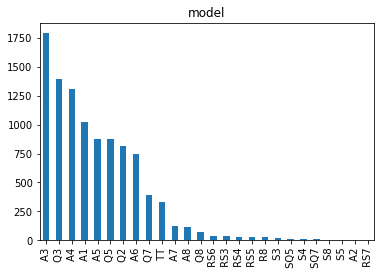

In [ ]:
feature = categorical_features[0]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**fitur transmission**

           jumlah sampel  persentase
Manual              3869        38.4
Semi-Auto           3570        35.4
Automatic           2636        26.2


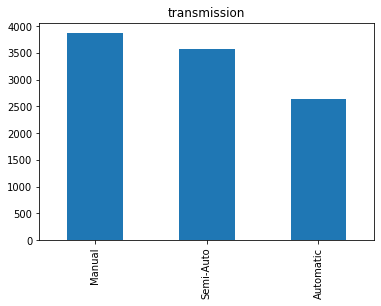

In [ ]:
feature = categorical_features[1]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**fitur fuelType**

        jumlah sampel  persentase
Diesel           5186        51.5
Petrol           4874        48.4
Hybrid             15         0.1


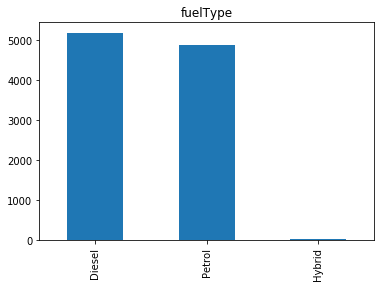

In [ ]:
feature = categorical_features[2]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Selanjutnya, pada fitur numerikal

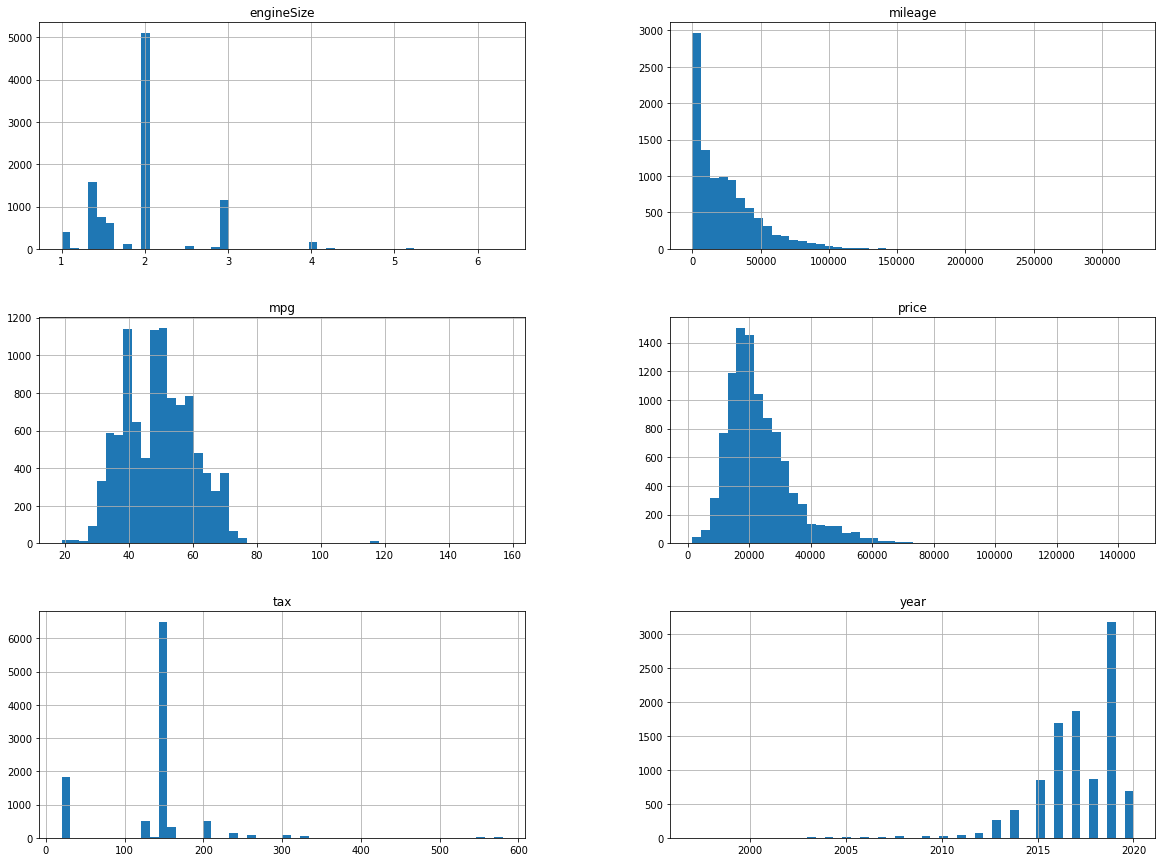

In [ ]:
cars.hist(bins=50, figsize=(20,15))
plt.show()

**Multivariate Analysis** \
Multivariate analysis merupakan proses eksplorasi yang melibatkan banyak (dua atau lebih) variabel pada data. dalam hal ini kita akan menganalisis keterkaitan/korelasi antara fitur target (price) dengan fitur lainnya.

fitur kategorikal \

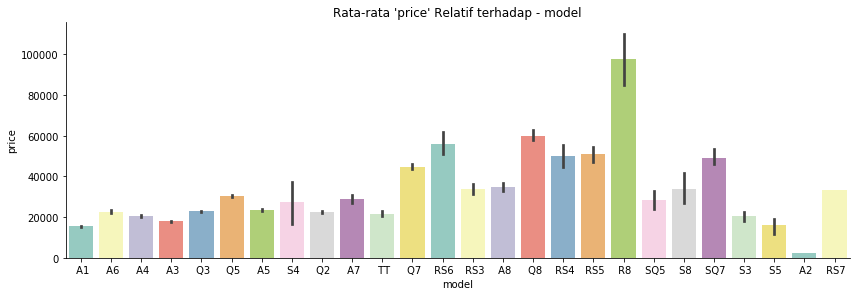

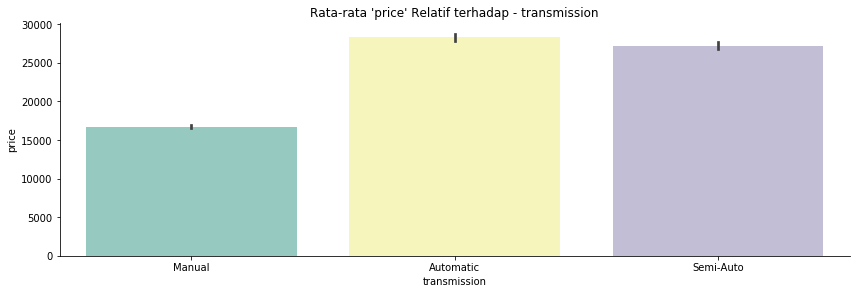

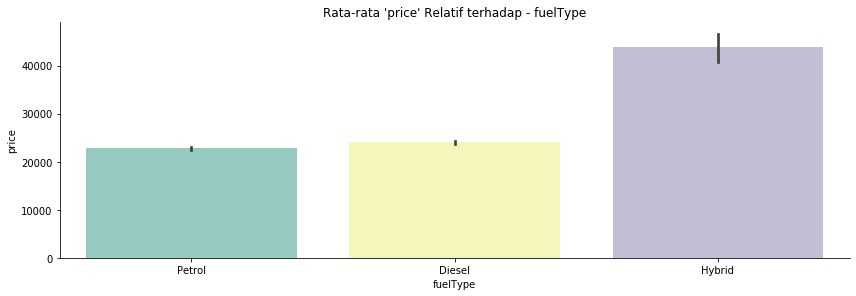

In [ ]:
cat_features = cars.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=cars, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

hasil yang didapat : 

- untuk fitur 'model', sebagian besar model memiliki rata-rata harga yang bervariasi. kirasan 20000-40000 euro. namun ada juga model yang memiliki harga yang cukup tinggi yaitu model R8. hal ini menunjukan bahwa model memiliki pengaruh yang cukup kecil terhadap harga.

- untuk fitur 'transmission', automatic transmission dan semi auto memiliki harga yang cukup tinggi.

- untuk FuelType, hybrid memiliki harga yang tinggi, sedangkan pada petrol dan diesel memiliki selisih harga yang tidak beda jauh.

- dapat disimpulkan bahwa ketiga fitur kategori mempengaruhi rata-rata harga. 

fitur numerikal \

menggunakan pairplot() serta menggunakan corr() untuk menghitung korelasi antar fitur target dengan fitur numerik 

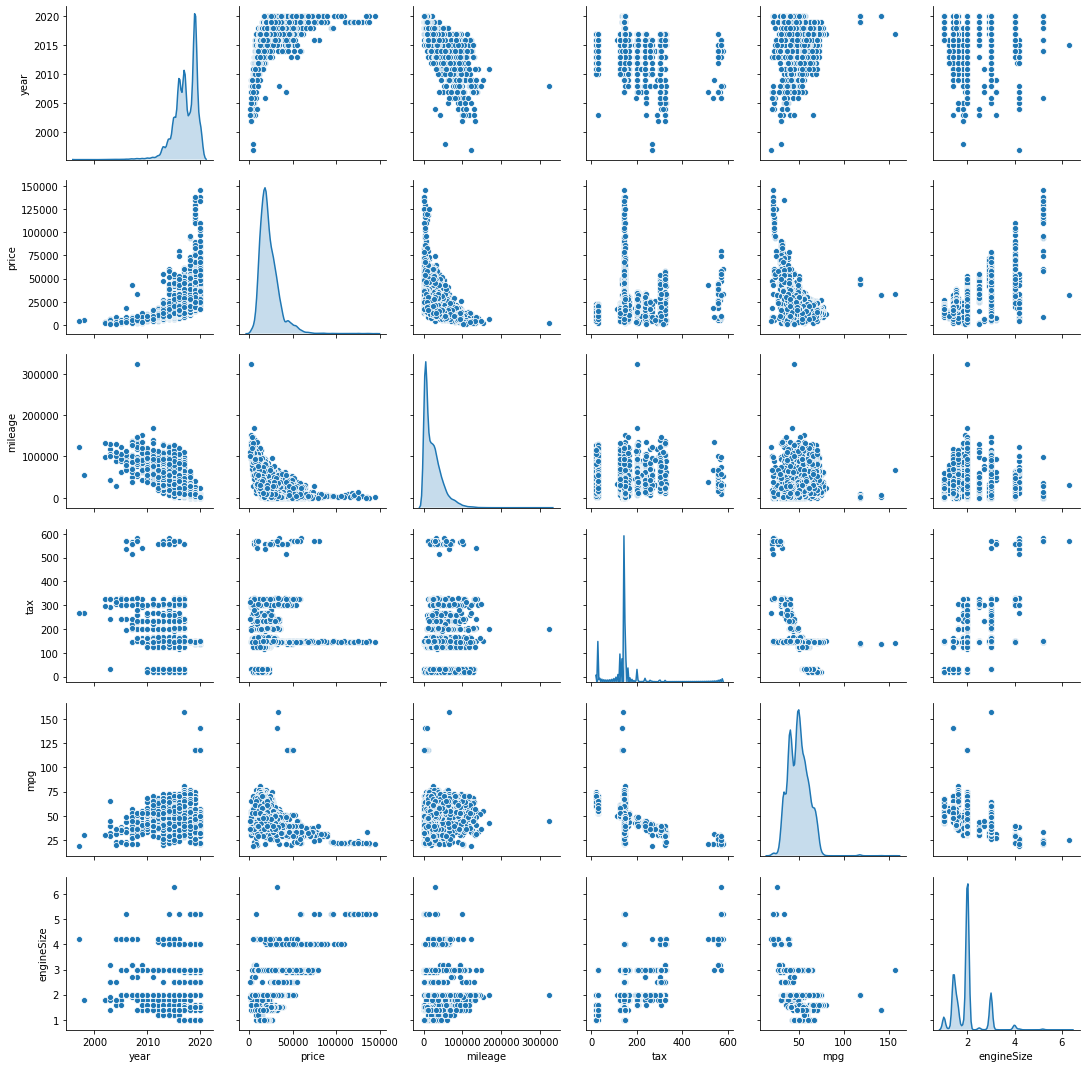

In [ ]:
sns.pairplot(cars, diag_kind = 'kde')

hasil nya : 

pada kasus diatas, terjadi relasi antar fitur numerik dengan fitur target(price). pada grafik year dan engineSize terjadi korelasi positif, kemudian pada grafik mileage dan mpg terjadi korelasi negatif. sedangkan pada grafik tax tidak memiliki korelasi 

untuk melihat hasil korelasi secara numerik, dapat menggunakan corr()

Text(0.5, 1, 'Correlation Matrix untuk Fitur Numerik ')

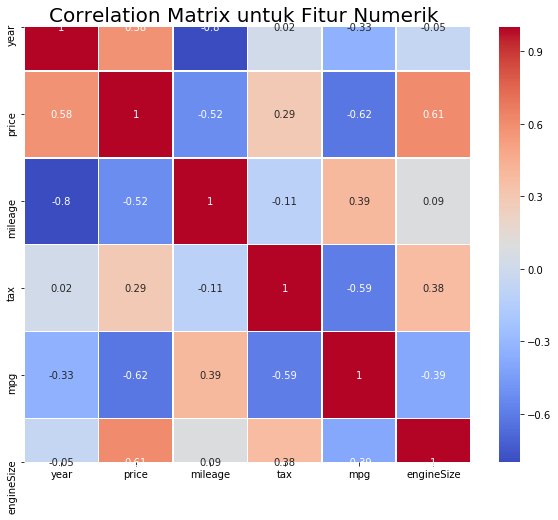

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = cars.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Perhatikan pada baris price karena kita akan mengamati korelasi antara fitur price dengan fitur numerik lainnya.  pada fitur year dan engineSize memiliki nilai korelasi mendekati 1, lalu pada fitur mileage dan mpg memiliki nilai korelasi mendekati -1 sedangkan fitur tax memiliki nilai korelasi mendekati 0 (korelasi lemah). 

oleh karena itu, fitur tax tidak berkorelasi dengan fitur price sehingga fitur tax dapat di drop. 

In [ ]:
cars.drop(['tax'], inplace=True, axis=1)
cars.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


## Data Preparation

 - Encoding categorical Feature

mengubah fitur kategori menjadi fitur numerik dengan teknik one-hot-encoding. Hal ini dilakukan karena mesin hanya dapat memproses data yang bernilai numerik khusunya bernilai 0 dan 1. kita dapat menggunakan library pandas dengan fungsi get_dummies()

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
cars = pd.concat([cars, pd.get_dummies(cars['model'], prefix='model', drop_first=True)],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['transmission'], prefix='transmission', drop_first=True)],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['fuelType'], prefix='fuelType', drop_first=True)],axis=1)
cars.drop(['model','transmission','fuelType'], axis=1, inplace=True)
cars.head()

,year,price,mileage,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,64.2,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,67.3,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


- Train test Split \

teknik digunakan untuk membagi dataset menjadi data latih dan data uji. dalam kasus ini, pembagiannya 90:10 

In [ ]:
from sklearn.model_selection import train_test_split
 
X = cars.drop(["price"],axis =1)
y = cars["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

cek jumlah sampel ada masing-masing bagian

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}') 

Total # of sample in whole dataset: 10075
Total # of sample in train dataset: 9067
Total # of sample in test dataset: 1008


- Standarisation \

Tujuan standarisasi adalah agar performa algoritma Machine Learning lebih baik serta dapat mempermudah data diolah oleh algoritma. Standarisasi dilakukan dengan mengurangi mean kemudian membaginya dengan milai standar deviasi untuk menggeser distribusi. Kita akan menggunakan library scikitlearn dengan teknik StandarScaler. 

kita terapkan standarisasi pada data latih, sedangkan pada tahap evaluasi diterapkan standarisasi pada data uji

In [ ]:
#standarisasi dengan menggunakan teknik StandarScaler
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['year', 'mileage','mpg','engineSize']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,mileage,mpg,engineSize
820,-1.020912,-0.430685,0.544961,-0.955204
6447,-0.087974,-0.624873,0.744999,-0.955204
3385,0.378495,-0.986360,0.090329,1.757453
7884,-1.020912,1.823574,-2.046442,3.791946
5069,-0.554443,0.316066,-0.537063,0.062042


cek hasil standarisasi dengan menggunakan describe()

In [ ]:
X_train[numerical_features].describe().round(4)

,year,mileage,mpg,engineSize
count,9067.0000,9067.0000,9067.0000,9067.0000
mean,0.0000,-0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-9.4174,-1.0295,-2.7739,-1.6334
25%,-0.5544,-0.7903,-0.7735,-0.7857
50%,-0.0880,-0.2767,0.0176,0.0620
75%,0.8450,0.4802,0.6450,0.0620
max,1.3114,12.9336,9.7740,7.3523


hasilnya, nilai mean berubah menjadi 0 dan nilai standar deviasi menjadi 1. menandakan bahwa dataset siap untuk dilatih menggunakan Model ML

## Modeling

Model yang akan digunakan dalam menyelesaikan permasalahan prediksi harga mobil ini, diantaranya KNN, Random Forest, dan Boosting. 

Sebelum masuk ke tahapan modeling dengan ketiga model diatas, terlebih dahulu siapkan dataframe untuk analisa model nantinya. 

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

* K-Nearest Neighbor \

cara kerja :
      a. tentukan parameter k \
      b. Hitung jarak antara data yang akan dievaluasi dengan semua pelatihan \
      c. urutkan jarak yang berbentuk menaik \
      d. tentukan jarak trdekat sampai urutan k \
      e. pasangkan kelas yang bersesuaian \
      f. cari jumlah kelas dari tetangga yang terdekat dan tetapkan kelas tersebut sebagai kelas data yang akan dievaluasi \

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

* Random Forest \

cara kerja : 
Random forest  adalah kombinasi dari  masing – masing tree yang baik kemudian dikombinasikan  ke dalam satu model. Random Forest bergantung pada sebuah nilai vector random dengan distribusi yang sama pada semua pohon yang masing masing decision tree memiliki kedalaman yang maksimal. 


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

* Boosting\
cara kerja : 
Algoritma boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluation

Karena masalah yang diselesaikan termasuk regresi, maka metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung selisih rata-rata nilai sebenarnya dengan nilai prediksi. 

Sebelum menghitung nilai MSE, kita akan lakukan scaling fitur numerik pada data uji. Tujuannya untuk menghindari kebocoraan data.

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Selanjutnya dilakukan evaluasi terhadap 3 model algoritma machine learning dengan metrik MSE.

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,6170.57,8921.86
RF,1431.57,4725.16
Boosting,27964.1,31396.6


visualisasikan ke dalam bentuk bar chart

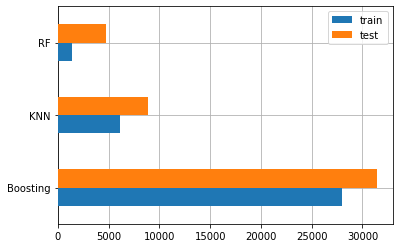

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk mengujinya, kita dapat membuat prediksi dengan beberapa harga dari dataset. 

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
6902,18899,15607.1,17415.0,15863.1


Hasil uji menunjukkan bahwa prediksi dengan Random Forest memberikan hasil yang mendekati.